**Problem 1** 🧀🧀 Implement Golden Section Search (GSS) in Python.

Given the function $f(x) = x^4 - 3x^3 + 2x$ on the interval $[0, 3]$:

**Starting point:** You have 3 points:
- Left endpoint: $a$
- Right endpoint: $b$  
- Current guess: $x_c$ (initially, could be the midpoint)

**In each iteration:** Generate **one new guess** $x_{\text{new}}$ and evaluate $f(x_{\text{new}})$. Compare with $f(x_c)$ to decide which sub-interval to keep. 

### Part (a): Random vs Golden Ratio Selection

a) Implement GSS with **random guess selection**: Generate the new guess $x_{\text{new}}$ randomly within the current interval $[a, b]$ using `np.random.uniform(a, b)`.

b) Implement GSS with **golden ratio** ($\phi = \frac{1 + \sqrt{5}}{2}$): Generate the new guess $x_{\text{new}}$ using the golden ratio formula. 

c) Compare both methods:
   - Run each method with `max_iter=50`
   - Plot the convergence: iteration number vs. interval length
   - Plot the iteration number vs distance to true minimum

### Part (b): Maximum Iterations for Tolerance

For Golden Section Search on interval $[a, b]$.

d) Derive the formula for the number of iterations $n$ needed to reduce the interval to length $\epsilon$.


e) Given $[a, b] = [0, 10]$ and tolerance $\epsilon = 10^{-6}$, how many iterations are required?

f) Implement a function `max_iterations_for_tolerance(a, b, epsilon)` that returns the required number of iterations.

g) Verify your formula by running GSS and checking when the interval length first becomes $< \epsilon$.

### Part (c): Early Stopping Criteria

Add both **absolute** and **relative** stopping criteria to your Golden Section Search implementation:

**Absolute criterion:** Stop if $|f(x^{(k+1)}) - f(x^{(k)})| < \varepsilon_{\text{abs}}$

**Relative criterion:** Stop if $\frac{|f(x^{(k+1)}) - f(x^{(k)})|}{|f(x^{(k)})| + \delta} < \varepsilon_{\text{rel}}$

where $\delta = 10^{-10}$ is a small constant to avoid division by zero.

h) Implement `golden_section_search_with_stopping(f, a, b, max_iter, eps_abs, eps_rel)`

i) Test on $f(x) = (x-2)^2 + 0.001$ on $[0, 4]$ with:
   - `eps_abs = 1e-6`
   - `eps_rel = 1e-4`
   - `max_iter = 100`

j) Report which stopping criterion was triggered and at which iteration.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# fix the state
np.random.seed(509)

def func(x):
    return x**4 - 3*x**3 + 2*x


def gss_initial(f, left, right, current, max_iter=1_000):
    f_left = f(left)
    f_right = f(right)
    f_current = f(current)


    estimates = []

    for i in range(max_iter):
        new = np.random.uniform(left, right)
        f_new = f(new)

        print(new, f_new)
        
        if new < current:
            if f_new <= f_current:
                right, f_right = current, f_current
                current, f_current = new, f_new
            else:
                left, f_left = new, f_new
        else:
            if f_new <= f_current:
                left, f_left = current, f_current
                current, f_current = new, f_new 
            else:
                right, f_right = new, f_new
                
        estimates.append((left + right) / 2)
        
        if abs(right - left) < 1e-6:
            break
        
        # print(f"Iteration {i}")
        # print(f"Left: {left}, f(Left): {f_left}")
        # print(f"Right: {right}, f(Right): {f_right}")
        # print(f"Current: {current}, f(Current): {f_current}")
        # print(f"Estimates: {estimates[-1]}\n")
    return estimates

1.1964601486821578 -0.6960978275319349
2.674605762561301 -0.8765027546005904
2.6639935650416913 -1.0245484929188855
1.7724976774194476 -3.2906472328708523
2.4330625967071966 -3.299603707434909
2.1663143945414327 -4.1428991419423715
1.906524058481448 -3.7646291066102653
2.4131590720029115 -3.420344865300118
2.0290658500269854 -4.052939266914474
2.208172295027654 -4.109345915049781
Num iters 10


Text(0.5, 1.0, 'Function Visualization with Initial Points')

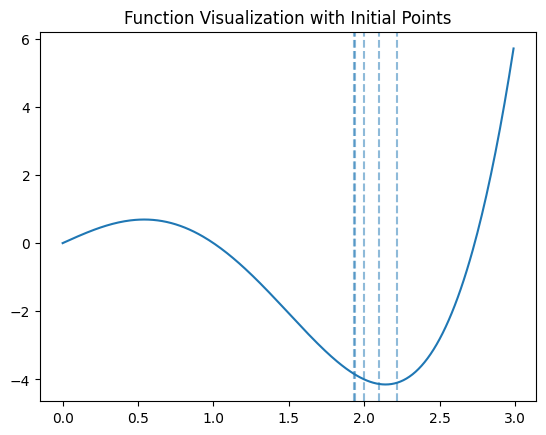

In [87]:

LEFT = 0
RIGHT = 3
CURRENT = 1

estimates = gss_initial(func, LEFT, RIGHT, CURRENT, 10)

print(f"Num iters {len(estimates)}")

x = np.arange(LEFT, RIGHT, 0.01)
f_x = func(x)


plt.plot(x, f_x, label='f(x)')
# plt.scatter([LEFT, RIGHT, CURRENT], [func(LEFT), func(RIGHT), func(CURRENT)], color='red')

# plot first 5 estimates
for i, est in enumerate(estimates[:5]):
    plt.axvline(x=est, linestyle='--', alpha=0.5, label=f'Estimate {i+1}')

plt.title('Function Visualization with Initial Points')

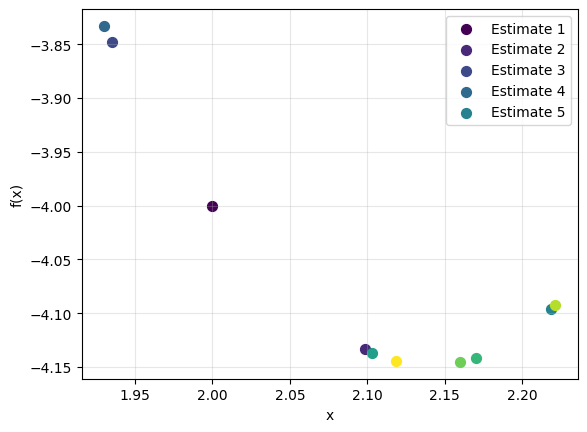

In [88]:
# Color the estimates by their index
colors = plt.cm.viridis(np.linspace(0, 1, len(estimates)))
for i, (est, color) in enumerate(zip(estimates, colors)):
    plt.scatter(est, func(est), color=color, s=50, label=f'Estimate {i+1}' if i < 5 else '')

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.show()


In [19]:
estimates[-1], x_min

(1.8662276801125428, 2.140913288808422)

In [3]:
def true_min_on_interval(f, a, b):
    # derivative: 4x^3 - 9x^2 + 2
    coeff = [4.0, -9.0, 0.0, 2.0]  # 4x^3 - 9x^2 + 0x + 2
    roots = np.roots(coeff)
    candidates = [a, b]
    for r in roots:
        if np.isreal(r):
            rr = float(np.real(r))
            if a <= rr <= b:
                candidates.append(rr)
    vals = [(x, f(x)) for x in candidates]
    x_star, f_star = min(vals, key=lambda t: t[1])
    return x_star, f_star

In [4]:
x_min, _ = true_min_on_interval(func, LEFT, RIGHT)

NameError: name 'LEFT' is not defined

# GSS Proper

In [89]:
def gss_initial(f, left, right, current, max_iter=1_000):
    f_left = f(left)
    f_right = f(right)
    f_current = f(current)

    estimates = []

    for i in range(max_iter):
        new = np.random.uniform(left, right)
        f_new = f(new)

        print(new, f_new)
        
        if new < current:
            if f_new <= f_current:
                right, f_right = current, f_current
                current, f_current = new, f_new
            else:
                left, f_left = new, f_new
        else:
            if f_new <= f_current:
                left, f_left = current, f_current
                current, f_current = new, f_new 
            else:
                right, f_right = new, f_new
                
        estimates.append((left + right) / 2)
        # print(f"Iteration {i}")
        # print(f"Left: {left}, f(Left): {f_left}")
        # print(f"Right: {right}, f(Right): {f_right}")
        # print(f"Current: {current}, f(Current): {f_current}")
        # print(f"Estimates: {estimates[-1]}\n")
    return estimates

In [5]:
def gss(f, left, right, tol=10e-2, max_iter=1_000):
    phi = (1 + 5 ** 0.5) / 2  # golden ratio
    
    f_left = f(left)
    f_right = f(right)
    
    interval_length = right - left
    
    x1 = left  + (1-1/phi) * interval_length
    x2 = right - (1-1/phi) * interval_length
    
    f_x1 = f(x1)
    f_x2 = f(x2)
    
    estimates = []
    
    for i in range(max_iter):
        print(f"Iter {i}: {left:.3f} {x1:.3f} {x2:.3f} {right:.3f}")
        if f_x1 < f_x2:
            # Keep left interval [left, x2], discard [x2, right]
            right = x2
            f_right = f_x2
            x2 = x1
            f_x2 = f_x1
            interval_length = right - left
            x1 = left + (1 - 1/phi) * interval_length
            f_x1 = f(x1)
        else:
            # Keep right interval [x1, right], discard [left, x1]
            left = x1
            f_left = f_x1
            x1 = x2
            f_x1 = f_x2
            interval_length = right - left
            x2 = right - (1 - 1/phi) * interval_length
            f_x2 = f(x2)

        x1, x2 = min(x1, x2), max(x1, x2)

        if abs(right - left) < tol:
            break


        estimates.append((left + right) / 2)
    
    return estimates
                

In [136]:
phi = (1 + 5 ** 0.5) / 2  # golden ratio

1 / phi

0.6180339887498948

In [137]:
2 - phi

0.3819660112501051

In [138]:
1 - (1/phi)

0.3819660112501052

In [139]:
phi - 1

0.6180339887498949

In [140]:
interval_len = 3 

tol = 10e-5 # 0.00001

np.log(interval_len / tol) / np.log(phi)

21.422899695715945

In [141]:
estimates = gss(func, LEFT, RIGHT, 10e-20)
print(estimates)

print("Num Iterations:", len(estimates))

Iter 0: 0.000 1.146 1.854 3.000
Iter 1: 1.146 1.854 2.292 3.000
Iter 2: 1.854 2.292 2.562 3.000
Iter 3: 1.854 2.125 2.292 2.562
Iter 4: 1.854 2.021 2.125 2.292
Iter 5: 2.021 2.125 2.188 2.292
Iter 6: 2.021 2.085 2.125 2.188
Iter 7: 2.085 2.125 2.149 2.188
Iter 8: 2.125 2.149 2.164 2.188
Iter 9: 2.125 2.140 2.149 2.164
Iter 10: 2.125 2.134 2.140 2.149
Iter 11: 2.134 2.140 2.143 2.149
Iter 12: 2.134 2.137 2.140 2.143
Iter 13: 2.137 2.140 2.141 2.143
Iter 14: 2.140 2.141 2.142 2.143
Iter 15: 2.140 2.141 2.141 2.142
Iter 16: 2.141 2.141 2.141 2.142
Iter 17: 2.141 2.141 2.141 2.141
Iter 18: 2.141 2.141 2.141 2.141
Iter 19: 2.141 2.141 2.141 2.141
Iter 20: 2.141 2.141 2.141 2.141
Iter 21: 2.141 2.141 2.141 2.141
Iter 22: 2.141 2.141 2.141 2.141
Iter 23: 2.141 2.141 2.141 2.141
Iter 24: 2.141 2.141 2.141 2.141
Iter 25: 2.141 2.141 2.141 2.141
Iter 26: 2.141 2.141 2.141 2.141
Iter 27: 2.141 2.141 2.141 2.141
Iter 28: 2.141 2.141 2.141 2.141
Iter 29: 2.141 2.141 2.141 2.141
Iter 30: 2.141 2.141

In [1]:
x = np.arange(LEFT, RIGHT, 0.01)
f_x = func(x)


plt.plot(x, f_x, label='f(x)')
# plt.scatter([LEFT, RIGHT, CURRENT], [func(LEFT), func(RIGHT), func(CURRENT)], color='red')

# plot first 5 estimates
for i, est in enumerate(estimates):
    plt.axvline(x=est, linestyle='--', alpha=0.5, label=f'Estimate {i+1}')

plt.title('Function Visualization with Initial Points')

NameError: name 'np' is not defined

# Brent

In [6]:
def golden_section_step(current_best, left_bound, right_bound):
    """
    Compute a golden section search step.
    
    Parameters:
    -----------
    current_best : float
        The current best point
    left_bound, right_bound : float
        The current search interval bounds
        
    Returns:
    --------
    step_size : float
        The size of the step to take
    interval_reduction : float
        The amount by which the interval will be reduced
    """
    # Golden ratio constant (≈ 0.618)
    phi = (1 + 5**0.5) / 2
    golden_ratio = 2 - phi
    
    # Determine which direction to step: toward left or right boundary
    # The midpoint helps us decide which half of the interval to explore
    interval_midpoint = (left_bound + right_bound) / 2
    
    if current_best >= interval_midpoint:
        # Current best is in the RIGHT half of the interval
        # So we should explore toward the LEFT boundary
        # Distance from current_best to left_bound (will be negative)
        interval_reduction = left_bound - current_best
    else:
        # Current best is in the LEFT half of the interval
        # So we should explore toward the RIGHT boundary
        # Distance from current_best to right_bound (will be positive)
        interval_reduction = right_bound - current_best
    
    # Apply golden ratio to determine how far to step in that direction
    # This ensures systematic reduction of the search interval
    step_size = golden_ratio * interval_reduction
    
    return step_size, interval_reduction

In [9]:
def brent(f, left_bound, right_bound, tol=1e-5, max_iter=1000):
    """
    Brent's method for finding the minimum of a function.
    
    Combines golden section search with parabolic interpolation for faster convergence.
    
    Parameters:
    -----------
    f : function
        The function to minimize
    left_bound, right_bound : float
        The initial interval [left_bound, right_bound] that brackets the minimum
    tol : float
        Tolerance for convergence (default: 1e-5)
    max_iter : int
        Maximum number of iterations (default: 1000)
    
    Returns:
    --------
    estimates : list
        List of best estimates at each iteration
    """
    
    # Golden ratio constant (≈ 0.618)
    phi = (1 + 5**0.5) / 2
    golden_ratio = 2 - phi
    
    # Initialize the current best point using golden section
    current_best = left_bound + golden_ratio * (right_bound - left_bound)
    
    # Keep track of second-best and third-best points for parabolic interpolation
    second_best = current_best  # Second-best point
    third_best = current_best   # Third-best point
    
    # Function values at these points
    f_current_best = f(current_best)
    f_second_best = f_current_best
    f_third_best = f_current_best
    
    # Distance moved in the step before last (used to decide between parabolic and golden)
    previous_step_size = 0.0
    
    estimates = []
    
    for iteration in range(max_iter):
        # Calculate interval midpoint and tolerances
        interval_midpoint = (left_bound + right_bound) / 2
        tolerance_1 = tol * abs(current_best) + 1e-10  # Numerical safety margin
        tolerance_2 = 2.0 * tolerance_1
        
        # Check for convergence: is current_best close enough to the midpoint?
        if abs(current_best - interval_midpoint) <= (tolerance_2 - 0.5 * (right_bound - left_bound)):
            break
        
        # Try parabolic interpolation first (faster when applicable)
        should_use_parabolic = False
        
        # Only try parabolic if the previous step was large enough
        if abs(previous_step_size) > tolerance_1:
            # ============================================================
            # PARABOLIC INTERPOLATION:
            # Fit parabola p(x) = a + b·x + c·x² through three points
            # ============================================================
            # We have three points with known positions and function values:
            #   Point 1: (current_best, f_current_best)
            #   Point 2: (second_best, f_second_best)  
            #   Point 3: (third_best, f_third_best)
            #
            # System of Linear Equations (SLE):
            #   a + b·current_best + c·current_best² = f_current_best
            #   a + b·second_best  + c·second_best²  = f_second_best
            #   a + b·third_best   + c·third_best²   = f_third_best
            #
            # Matrix form: A·coeff = f_values, where:
            #   A = [1  x  x²]     coeff = [a]     f_values = [f(x)]
            #       [1  w  w²]             [b]                 [f(w)]
            #       [1  v  v²]             [c]                 [f(v)]
            
            from scipy.linalg import solve
            
            # Build the Vandermonde-like matrix (basis: 1, x, x²)
            A = np.array([
                [1.0, current_best, current_best**2],
                [1.0, second_best, second_best**2],
                [1.0, third_best, third_best**2]
            ])
            
            # Build the right-hand side (function values)
            f_values = np.array([f_current_best, f_second_best, f_third_best])
            
            # Solve for coefficients: [a, b, c]
            try:
                coeffs = solve(A, f_values)
                a, b, c = coeffs
                
                # The minimum of p(x) = a + b·x + c·x² is at x_min = -b/(2c)
                # Check if c is positive (parabola opens upward) and large enough
                if abs(c) > 1e-10:  # Avoid division by near-zero
                    x_min_parabola = -b / (2 * c)
                    
                    # Calculate step from current_best to the parabola's minimum
                    parabola_numerator = x_min_parabola - current_best
                    parabola_denominator = 1.0
                else:
                    # c is too small, parabola is nearly flat - skip this step
                    parabola_numerator = 0.0
                    parabola_denominator = 1.0
                    
            except np.linalg.LinAlgError:
                # Matrix is singular (points are collinear) - skip parabolic interpolation
                parabola_numerator = 0.0
                parabola_denominator = 1.0
            
            # Validate the parabolic step:
            # 1. Making progress: step smaller than half the previous step
            # 2. Within bounds: new point stays in [left_bound, right_bound]
            step_size_from_parabola = parabola_numerator / parabola_denominator
            new_point_from_parabola = current_best + step_size_from_parabola
            
            step_makes_progress = abs(step_size_from_parabola) < abs(0.5 * previous_step_size)
            step_within_bounds = left_bound < new_point_from_parabola < right_bound
            
            parabolic_step_acceptable = (
                step_makes_progress and 
                step_within_bounds
            )
            
            if parabolic_step_acceptable:
                # Take the parabolic step - move to the parabola's minimum
                step_size = step_size_from_parabola
                new_point = new_point_from_parabola
                
                # Ensure we don't evaluate too close to the bounds
                too_close_to_left = (new_point - left_bound) < tolerance_2
                too_close_to_right = (right_bound - new_point) < tolerance_2
                
                if too_close_to_left or too_close_to_right:
                    # Adjust step to maintain minimum distance from bounds
                    step_size = tolerance_1 if current_best < interval_midpoint else -tolerance_1
                
                should_use_parabolic = True
        
        # If parabolic interpolation didn't work or wasn't tried, use golden section
        if not should_use_parabolic:
            # Call our golden section step function
            step_size, interval_reduction = golden_section_step(
                current_best, left_bound, right_bound
            )
            previous_step_size = interval_reduction
        
        # Ensure we don't evaluate too close to the current best point
        if abs(step_size) >= tolerance_1:
            new_point = current_best + step_size
        else:
            # Take a minimum step in the appropriate direction
            new_point = current_best + (tolerance_1 if step_size > 0 else -tolerance_1)
        
        # Evaluate function at the new point
        f_new_point = f(new_point)
        
        # Update interval bounds and best points based on comparison
        if f_new_point <= f_current_best:
            # New point is better than current best - update interval and shift points
            if new_point >= current_best:
                left_bound = current_best  # Minimum is to the right, move left bound
            else:
                right_bound = current_best  # Minimum is to the left, move right bound
            
            # Shift the points: current becomes second, second becomes third, new becomes current
            third_best = second_best
            second_best = current_best
            current_best = new_point
            
            f_third_best = f_second_best
            f_second_best = f_current_best
            f_current_best = f_new_point
        else:
            # New point is worse than current best - only update interval bounds
            if new_point < current_best:
                left_bound = new_point
            else:
                right_bound = new_point
            
            # Update second and third best points if appropriate
            if f_new_point <= f_second_best or second_best == current_best:
                third_best = second_best
                second_best = new_point
                f_third_best = f_second_best
                f_second_best = f_new_point
            elif f_new_point <= f_third_best or third_best == current_best or third_best == second_best:
                third_best = new_point
                f_third_best = f_new_point
        
        # Store the current best estimate for this iteration
        estimates.append(current_best)
        
        # Optional: print progress for debugging
        # print(f"Iter {iteration}: best={current_best:.6f}, f(best)={f_current_best:.6f}, "
        #       f"interval=[{left_bound:.6f}, {right_bound:.6f}]")
    
    return estimates

---

## Test Brent's Method

Let's test Brent's method on the same function: $f(x) = x^4 - 3x^3 + 2x$ on the interval $[0, 3]$.

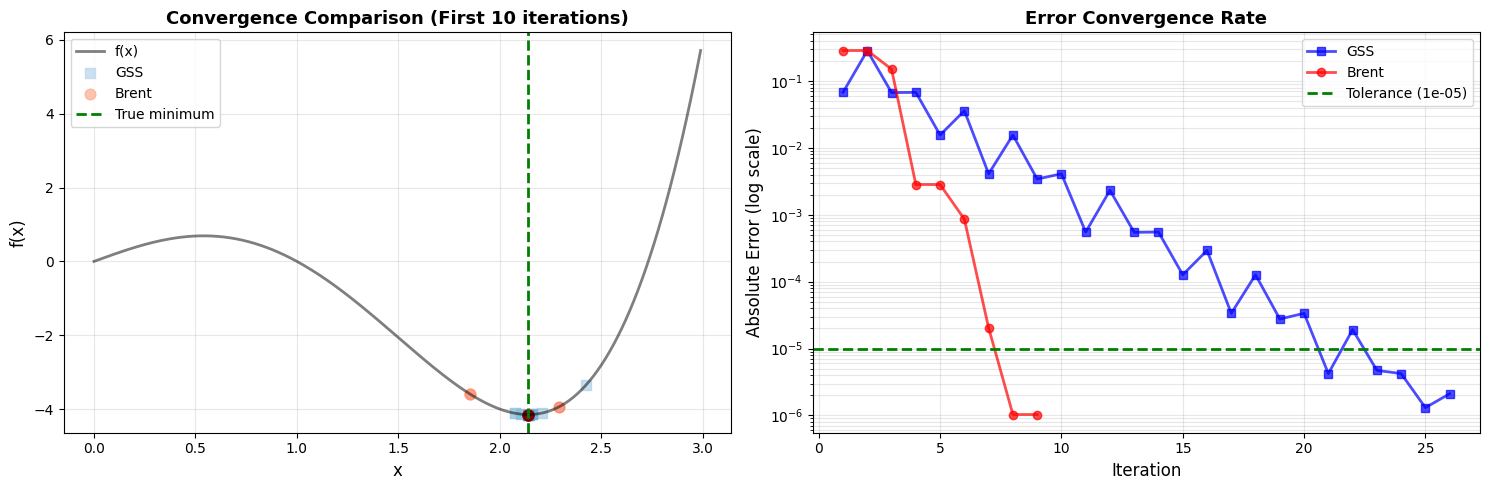

GSS converged in 26 iterations
Brent converged in 9 iterations
Brent was 2.9x faster (in iterations)


In [13]:
# Visualize convergence comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Left plot: Both methods on the same function
x = np.arange(LEFT, RIGHT, 0.01)
f_x = func(x)

axes[0].plot(x, f_x, 'k-', linewidth=2, label='f(x)', alpha=0.5)

# Plot GSS estimates
colors_gss = plt.cm.Blues(np.linspace(0.3, 1, len(estimates_gss)))
for i, (est, color) in enumerate(zip(estimates_gss[:10], colors_gss[:10])):  # Show first 10
    axes[0].scatter(est, func(est), color=color, s=60, marker='s', 
                   label='GSS' if i == 0 else None, alpha=0.7)

# Plot Brent estimates
colors_brent = plt.cm.Reds(np.linspace(0.3, 1, len(estimates_brent)))
for i, (est, color) in enumerate(zip(estimates_brent[:10], colors_brent[:10])):  # Show first 10
    axes[0].scatter(est, func(est), color=color, s=60, marker='o', 
                   label="Brent" if i == 0 else None, alpha=0.7)

axes[0].axvline(x_true, color='green', linestyle='--', linewidth=2, label='True minimum')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('f(x)', fontsize=12)
axes[0].set_title('Convergence Comparison (First 10 iterations)', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right plot: Error over iterations
errors_gss = [abs(est - x_true) for est in estimates_gss]
errors_brent = [abs(est - x_true) for est in estimates_brent]

axes[1].semilogy(range(1, len(errors_gss) + 1), errors_gss, 
                 'bs-', linewidth=2, markersize=6, label='GSS', alpha=0.7)
axes[1].semilogy(range(1, len(errors_brent) + 1), errors_brent, 
                 'ro-', linewidth=2, markersize=6, label='Brent', alpha=0.7)

axes[1].axhline(tolerance, color='green', linestyle='--', linewidth=2, 
                label=f'Tolerance ({tolerance})')
axes[1].set_xlabel('Iteration', fontsize=12)
axes[1].set_ylabel('Absolute Error (log scale)', fontsize=12)
axes[1].set_title('Error Convergence Rate', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

print(f"GSS converged in {len(estimates_gss)} iterations")
print(f"Brent converged in {len(estimates_brent)} iterations")
print(f"Brent was {len(estimates_gss) / len(estimates_brent):.1f}x faster (in iterations)")

In [12]:
import time

# Set the same tolerance for fair comparison
tolerance = 1e-5
LEFT = 0
RIGHT = 3

# Test GSS
start_time_gss = time.time()
estimates_gss = gss(func, LEFT, RIGHT, tol=tolerance, max_iter=1000)
time_gss = time.time() - start_time_gss

# Test Brent
start_time_brent = time.time()
estimates_brent = brent(func, LEFT, RIGHT, tol=tolerance, max_iter=1000)
time_brent = time.time() - start_time_brent

# Calculate true minimum for comparison
x_true, f_true = true_min_on_interval(func, LEFT, RIGHT)

print("="*60)
print("COMPARISON: Golden Section Search vs Brent's Method")
print("="*60)
print(f"\nTest function: f(x) = x⁴ - 3x³ + 2x")
print(f"Search interval: [{LEFT}, {RIGHT}]")
print(f"Tolerance: {tolerance}")
print(f"\nTrue minimum: x = {x_true:.8f}, f(x) = {f_true:.8f}")
print("\n" + "-"*60)

print("\n📊 GOLDEN SECTION SEARCH:")
print(f"   Iterations:        {len(estimates_gss)}")
print(f"   Time:              {time_gss*1000:.4f} ms")
print(f"   Final estimate:    x = {estimates_gss[-1]:.8f}")
print(f"   Function value:    f(x) = {func(estimates_gss[-1]):.8f}")
print(f"   Error from true:   {abs(estimates_gss[-1] - x_true):.2e}")

print("\n📊 BRENT'S METHOD:")
print(f"   Iterations:        {len(estimates_brent)}")
print(f"   Time:              {time_brent*1000:.4f} ms")
print(f"   Final estimate:    x = {estimates_brent[-1]:.8f}")
print(f"   Function value:    f(x) = {func(estimates_brent[-1]):.8f}")
print(f"   Error from true:   {abs(estimates_brent[-1] - x_true):.2e}")

print("\n" + "="*60)
print("🏆 WINNER:")
print("="*60)

if len(estimates_brent) < len(estimates_gss):
    iter_speedup = len(estimates_gss) / len(estimates_brent)
    print(f"✓ Brent's method used {len(estimates_gss) - len(estimates_brent)} fewer iterations")
    print(f"  ({iter_speedup:.1f}x faster in iterations)")
else:
    print(f"✓ GSS used {len(estimates_brent) - len(estimates_gss)} fewer iterations")

if time_brent < time_gss:
    time_speedup = time_gss / time_brent
    print(f"✓ Brent's method was {time_speedup:.2f}x faster in execution time")
else:
    time_speedup = time_brent / time_gss
    print(f"✓ GSS was {time_speedup:.2f}x faster in execution time")

print("\n💡 Why Brent is typically faster:")
print("   • GSS: Uses only golden ratio (linear convergence)")
print("   • Brent: Combines parabolic interpolation (superlinear)")
print("           with golden section as fallback")
print("="*60)

Iter 0: 0.000 1.146 1.854 3.000
Iter 1: 1.146 1.854 2.292 3.000
Iter 2: 1.854 2.292 2.562 3.000
Iter 3: 1.854 2.125 2.292 2.562
Iter 4: 1.854 2.021 2.125 2.292
Iter 5: 2.021 2.125 2.188 2.292
Iter 6: 2.021 2.085 2.125 2.188
Iter 7: 2.085 2.125 2.149 2.188
Iter 8: 2.125 2.149 2.164 2.188
Iter 9: 2.125 2.140 2.149 2.164
Iter 10: 2.125 2.134 2.140 2.149
Iter 11: 2.134 2.140 2.143 2.149
Iter 12: 2.134 2.137 2.140 2.143
Iter 13: 2.137 2.140 2.141 2.143
Iter 14: 2.140 2.141 2.142 2.143
Iter 15: 2.140 2.141 2.141 2.142
Iter 16: 2.141 2.141 2.141 2.142
Iter 17: 2.141 2.141 2.141 2.141
Iter 18: 2.141 2.141 2.141 2.141
Iter 19: 2.141 2.141 2.141 2.141
Iter 20: 2.141 2.141 2.141 2.141
Iter 21: 2.141 2.141 2.141 2.141
Iter 22: 2.141 2.141 2.141 2.141
Iter 23: 2.141 2.141 2.141 2.141
Iter 24: 2.141 2.141 2.141 2.141
Iter 25: 2.141 2.141 2.141 2.141
Iter 26: 2.141 2.141 2.141 2.141
COMPARISON: Golden Section Search vs Brent's Method

Test function: f(x) = x⁴ - 3x³ + 2x
Search interval: [0, 3]
Tolera

C:\Users\hayk_\AppData\Local\Temp\ipykernel_10088\523374897.py:93: LinAlgWarning: Ill-conditioned matrix (rcond=5.97878e-18): result may not be accurate.
  coeffs = solve(A, f_values)


---

## Comparison: GSS vs Brent's Method

Let's compare both methods in terms of:
1. **Number of iterations** (fewer is better)
2. **Execution time** (faster is better)
3. **Convergence behavior** (how quickly they approach the minimum)

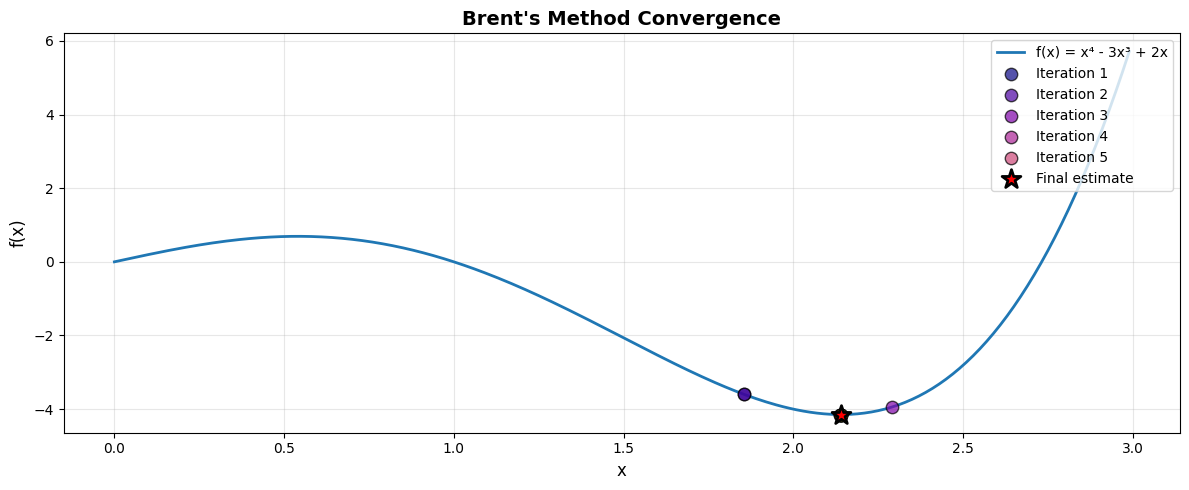

In [14]:
# Visualize Brent's convergence
x = np.arange(LEFT, RIGHT, 0.01)
f_x = func(x)

plt.figure(figsize=(12, 5))

# Plot function
plt.plot(x, f_x, label='f(x) = x⁴ - 3x³ + 2x', linewidth=2)

# Plot estimates from Brent
colors_brent = plt.cm.plasma(np.linspace(0, 1, len(estimates_brent)))
for i, (est, color) in enumerate(zip(estimates_brent, colors_brent)):
    label = f'Iteration {i+1}' if i < 5 else None
    plt.scatter(est, func(est), color=color, s=80, marker='o', 
                edgecolors='black', linewidths=1, alpha=0.7, label=label, zorder=5)

# Mark the final estimate
plt.scatter(estimates_brent[-1], func(estimates_brent[-1]), 
            color='red', s=200, marker='*', 
            edgecolors='black', linewidths=2, 
            label='Final estimate', zorder=10)

plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title("Brent's Method Convergence", fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [10]:
# Test with the same function and bounds as GSS
LEFT = 0
RIGHT = 3

# Run Brent's method
estimates_brent = brent(func, LEFT, RIGHT, tol=1e-5)

print(f"Brent's Method:")
print(f"Number of iterations: {len(estimates_brent)}")
print(f"Final estimate: {estimates_brent[-1]:.8f}")
print(f"Function value at minimum: {func(estimates_brent[-1]):.8f}")

Brent's Method:
Number of iterations: 9
Final estimate: 2.14091226
Function value at minimum: -4.14830270


C:\Users\hayk_\AppData\Local\Temp\ipykernel_10088\523374897.py:93: LinAlgWarning: Ill-conditioned matrix (rcond=5.97878e-18): result may not be accurate.
  coeffs = solve(A, f_values)
